# REMOVING THE MOST USED WORDS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## We will explain each step and their results.

We import some of the main libraries we will work with:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, let us upload the database and observe it:

In [3]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
#amazon_reviews

C:\Users\andre\AppData\Local\Temp\ipykernel_15952\2568999233.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


In [4]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

amazon_reviews.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

## The data is unevenly distributed along the ratings, we will solve this issue:

In [6]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(amazon_reviews, 1000, 3, 'reviews.rating')
df4 = random_select(amazon_reviews, 1000, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 1500, 5, 'reviews.rating')

In [7]:
df3.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count         0.0          983.000000          1000.0               0.0   
mean          NaN            0.288911             3.0               NaN   
std           NaN            1.573051             0.0               NaN   
min           NaN            0.000000             3.0               NaN   
25%           NaN            0.000000             3.0               NaN   
50%           NaN            0.000000             3.0               NaN   
75%           NaN            0.000000             3.0               NaN   
max           NaN           33.000000             3.0               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [8]:
df4.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count         0.0          994.000000          1000.0               0.0   
mean          NaN            0.479879             4.0               NaN   
std           NaN            7.720188             0.0               NaN   
min           NaN            0.000000             4.0               NaN   
25%           NaN            0.000000             4.0               NaN   
50%           NaN            0.000000             4.0               NaN   
75%           NaN            0.000000             4.0               NaN   
max           NaN          238.000000             4.0               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [9]:
df5.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count         0.0         1480.000000          1500.0               0.0   
mean          NaN            0.277027             5.0               NaN   
std           NaN            2.149959             0.0               NaN   
min           NaN            0.000000             5.0               NaN   
25%           NaN            0.000000             5.0               NaN   
50%           NaN            0.000000             5.0               NaN   
75%           NaN            0.000000             5.0               NaN   
max           NaN           48.000000             5.0               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [10]:
df12 = amazon_reviews[amazon_reviews['reviews.rating'].isin([1, 2])]

In [11]:
df12.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count         0.0          763.000000      812.000000               0.0   
mean          NaN            4.982962        1.495074               NaN   
std           NaN           29.055445        0.500284               NaN   
min           NaN            0.000000        1.000000               NaN   
25%           NaN            0.000000        1.000000               NaN   
50%           NaN            0.000000        1.000000               NaN   
75%           NaN            1.000000        2.000000               NaN   
max           NaN          422.000000        2.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

### Now let us create the final database we will actually work with:

In [12]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count         0.0         4220.000000     4312.000000               0.0   
mean          NaN            1.178436        3.644249               NaN   
std           NaN           13.111141        1.297025               NaN   
min           NaN            0.000000        1.000000               NaN   
25%           NaN            0.000000        3.000000               NaN   
50%           NaN            0.000000        4.000000               NaN   
75%           NaN            0.000000        5.000000               NaN   
max           NaN          422.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

## We now need to create the label:

In [13]:

def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)


# This will be the database for our Sentiment Analysis:

In [14]:
amazon = amazon[['id', 'reviews.text', 'reviews.rating', 'label']]
amazon.describe()

reviews.rating        label
count     4312.000000  4312.000000
mean         3.644249     0.579777
std          1.297025     0.493652
min          1.000000     0.000000
25%          3.000000     0.000000
50%          4.000000     1.000000
75%          5.000000     1.000000
max          5.000000     1.000000

## Let us observe how our database behaves:

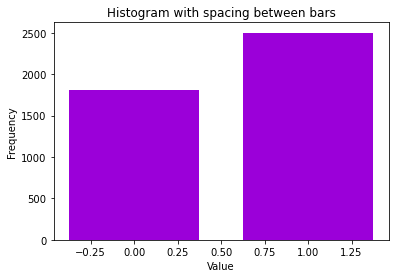

In [15]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

## Now, let us part our database in the three categories we have defined

In [16]:
good = amazon[amazon['label'] == 1]
bad = amazon[amazon['label'] == 0]

### In order to better visualise these, we can plot some wordclouds

In [17]:
!pip install wordcloud
from wordcloud import WordCloud

In [18]:

goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]
"""
goods_sentence = " ".join(goods)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(goods_sentence))
"""

'\ngoods_sentence = " ".join(goods)\nplt.figure(figsize=(20,20))\nplt.imshow(WordCloud().generate(goods_sentence))\n'

In [19]:

bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]
'''
bads_sentence = " ".join(bads)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bads_sentence))
'''

'\nbads_sentence = " ".join(bads)\nplt.figure(figsize=(20,20))\nplt.imshow(WordCloud().generate(bads_sentence))\n'

# Now it's time for some data cleaning!

## Punctuation

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# For good

g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g


In [22]:
# For bad
b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b

## Stopwords

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
rev = goods + bads
rev

['My children loved it and it is great learning tool',
 'we bought this amazon tablet because my 3 year received one as a gift for her aunt My 2 year was using an iPad but kept dropping it This is great because its small enough for him to hold and if you buy the case its completely protected The only issue we seem to have is that the power cord is really loose when you plug it in to charge so sometimes it does not get charged That is the only reason Im giving it 4 stars',
 'Awesome product Got two of these for two kids They really enjoy',
 'This is a nice and cheap android device HD display and Amazons sturdy build quality with 10 hours battery backup Sometimes runs a little slow rest is good',
 'Good features good cost Recommend to anyone looking for tablet',
 'this purchase was not for me but i decided ti purchase it for my wifeher name is rebecca',
 'Good upgrade to the Firestick Alexa search works well so you can quickly find titles',
 'I got this to test it out to see if it would 

In [68]:
all_text = ' '.join(rev)

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Convert tokens to lowercase
tokens = [word.lower() for word in tokens]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_freq = Counter(tokens)

# Get most common words
number_of_words_to_remove = 0
top_words = [word for word, _ in word_freq.most_common(number_of_words_to_remove)]
top_words

[]

In [69]:
STOPWORDS = stopwords.words('english') + top_words

In [70]:
# For good

g = []
for s in goods:
    sentence = [word for word in s.split() if word not in STOPWORDS]
    s = ' '.join(sentence)
    g.append(s)

goods = g


In [71]:
# For bad

b = []
for s in bads:
    sentence = [word for word in s.split() if word not in STOPWORDS]
    s = ' '.join(sentence)
    b.append(s)

bads = b


## Now, let us put it all together into a pipeline:

In [72]:
def data_cleaning(text):

    Test_punc_removed = [char for char in text if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean    

# Now we can perform tokenization!

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
# amazon_clean = amazon['reviews.text'].apply(data_cleaning)

In [75]:
# print(amazon_clean[11])

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)

In [79]:
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])

In [80]:
print(amazon_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [81]:
amazon_countvectorizer.shape

(4312, 8164)

In [127]:
X = pd.DataFrame(amazon_countvectorizer.toarray())

In [83]:
X

0     1     2     3     4     5     6     7     8     9     ...  8154  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     2     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4307     0     0     0     0     0     0     0     0     0     0  ...     0   
4308     0     0     0     0     0     0     0     0     0     0  ...     0   
4309     0     0     0     0     0     0     0     0     0     0  ...     0   
4310     0     0     0     0     0     0     0     0     0     0  ...     0   
4311     0     0     0     0     0     0     0     0     0     0  ...     0   

      8155  8156  8157  8158  8159  8160  8161  8162  8163  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4307     0     0     0     0     0     0     0     0     0  
4308     0     0     0     0     0     0     0     0     0  
4309     0     0     0     0     0     0     0     0     0  
4310     0     0     0     0     0     0     0     0     0  
4311     0     0     0     0     0     0     0     0     0  

[4312 rows x 8164 columns]

# We will now use Naive Bayes in order to continue:

In [84]:
y = amazon['label']

In [85]:
X.shape

(4312, 8164)

In [86]:
y.shape

(4312,)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [144]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

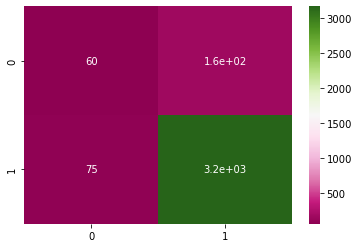

In [150]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       280
           1       0.79      0.86      0.82       367

    accuracy                           0.79       647
   macro avg       0.79      0.78      0.78       647
weighted avg       0.79      0.79      0.78       647



In [154]:
X_train

0      1      2      3      4      5      6      7      8      9      \
4248       0      0      0      0      0      0      0      0      0      0   
20788      0      0      0      0      0      0      0      0      0      0   
32112      0      0      0      0      0      0      0      0      0      0   
34206      0      0      0      0      0      0      0      0      0      0   
21968      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
987        0      0      0      0      0      0      0      0      0      0   
33981      0      0      0      0      0      0      0      0      0      0   
15022      0      0      0      0      0      0      0      0      0      0   
2738       0      0      0      0      0      0      0      0      0      0   
28396      0      0      0      0      0      0      0      0      0      0   

       ...  22322  22323  22324  22325  22326  22327  22328  22329  22330  \
4248   ...      0      0      0      0      0      0      0      0      0   
20788  ...      0      0      0      0      0      0      0      0      0   
32112  ...      0      0      0      0      0      0      0      0      0   
34206  ...      0      0      0      0      0      0      0      0      0   
21968  ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
987    ...      0      0      0      0      0      0      0      0      0   
33981  ...      0      0      0      0      0      0      0      0      0   
15022  ...      0      0      0      0      0      0      0      0      0   
2738   ...      0      0      0      0      0      0      0      0      0   
28396  ...      0      0      0      0      0      0      0      0      0   

       22331  
4248       0  
20788      0  
32112      0  
34206      0  
21968      0  
...      ...  
987        0  
33981      0  
15022      0  
2738       0  
28396      0  

[31194 rows x 22332 columns]

Now, we want to investigate a bit the reviews where the mosel did not predict well. Let's see how they look like:

In [155]:
bad_predictions = 50
i = 0
j = 0
#print(X_test.index)
'''while i < bad_predictions:
    if y[j] != y_predict_test[j]:
        i = i + 1
        print(j, X_test.index[j] ,amazon['reviews.rating'][X_test.index[j]]  ,y[j], y_predict_test[j], amazon['reviews.text'][X_test.index[j]])
        #print(X_test['reviews.text'][j])
    j = j + 1
#print(amazon['reviews.text'])
while i < bad_predictions:
    point = amazon['reviews.text'][j]
    #print(point)
    #pd_point = pd.DataFrame([[point]],columns=['reviews.text'])
    #print(pd_point)
    amazon_point = vectorizer.fit_transform([point])
    print(amazon_point.shape)
    #pointX = pd.DataFrame(amazon_point.toarray())
    predicted_point = NB_classifier.predict(amazon_point)
    
    j = j + 1
    i = i + 1'''
    
"""
def predict_single_data_point(new_data_point):
    # Preprocess the new data point using the loaded vectorizer
    new_data_point_vec = vectorizer.fit_transform(new_data_point['reviews.text'])
    # Make prediction on the preprocessed data point
    prediction = NB_classifier.predict(new_data_point_vec)
    return prediction[0]  # Assuming you want to return the single prediction
"""



# New data points to predict (assuming they are stored in a list)
#new_data = ["New review 1", "New review 2",  "New review 50"]

"""
# Make predictions for each new data point one by one
for i, data_point in enumerate(amazon['reviews.text']):
    print(data_point)
    data_df = pd.DataFrame([[data_point]], columns = ['reviews.text'])
    prediction = predict_single_data_point(data_df)
    print(f"Prediction for data point {i+1}: {prediction}")
    
"""

'\n# Make predictions for each new data point one by one\nfor i, data_point in enumerate(amazon[\'reviews.text\']):\n    print(data_point)\n    data_df = pd.DataFrame([[data_point]], columns = [\'reviews.text\'])\n    prediction = predict_single_data_point(data_df)\n    print(f"Prediction for data point {i+1}: {prediction}")\n    \n'

# More Methods:

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       280
           1       0.78      0.83      0.80       367

    accuracy                           0.77       647
   macro avg       0.76      0.76      0.76       647
weighted avg       0.77      0.77      0.77       647



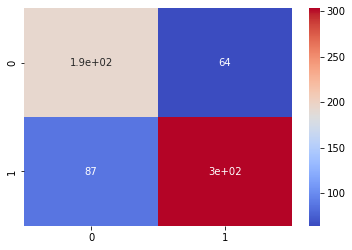

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))

# At this point we can observe that the accuracy is worryingly low, how the model works best on extremes, but has really big troubles in detecting the neutral labels. We will therefore train on the whole database for the sake of it and look for a better accuracy - at least for the extreme labels.

In [94]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

C:\Users\andre\AppData\Local\Temp\ipykernel_15952\2946610846.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                                                NaN  B006GWO5WK  Amazon   
34656                                                NaN  B006GWO5WK  Amazon   
34657                                                NaN  B006GWO5WK  Amazon   
34658                                                NaN  B006GWO5WK  Amazon   
34659                                                NaN  B006GWO5WK  Amazon   

                                              categories  \
0      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
...                                                  ...   
34655  Computers/Tablets & Networking,Tablet & eBook ...   
34656  Computers/Tablets & Networking,Tablet & eBook ...   
34657  Computers/Tablets & Networking,Tablet & eBook ...   
34658  Computers/Tablets & Networking,Tablet & eBook ...   
34659  Computers/Tablets & Networking,Tablet & eBook ...   

                                                    keys  \
0      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
1      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
2      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
3      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
4      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
...                                                  ...   
34655  newamazonkindlefirehd9wpowerfastadaptercharger...   
34656  newamazonkindlefirehd9wpowerfastadaptercharger...   
34657  newamazonkindlefirehd9wpowerfastadaptercharger...   
34658  newamazonkindlefirehd9wpowerfastadaptercharger...   
34659  newamazonkindlefirehd9wpowerfastadaptercharger...   

                       manufacturer              reviews.date  \
0                            Amazon  2017-01-13T00:00:00.000Z   
1                            Amazon  2017-01-13T00:00:00.000Z   
2                            Amazon  2017-01-13T00:00:00.000Z   
3                            Amazon  2017-01-13T00:00:00.000Z   
4                            Amazon  2017-01-12T00:00:00.000Z   
...                             ...                       ...   
34655  Amazon Digital Services, Inc      2012-09-18T00:00:00Z   
34656  Amazon Digital Services, Inc      2012-11-21T00:00:00Z   
34657  Amazon Digital Services, Inc      2012-10-19T00:00:00Z   
34658  Amazon Digital Services, Inc      2012-10-31T00:00:00Z   
34659  Amazon Digital Services, Inc      2012-12-23T00:00:00Z   

          reviews.dateAdded  \
0      2017-07-03T23:33:15Z   
1      2017-07-03T23:33:15Z   
2      2017-07-03T23:33:15Z   
3      2017-07-03T23:33:15Z   
4      2017-07-03T23:33:15Z   
...                     ...   
34655                   NaN   
34656                   NaN   
34657                   NaN   
34658                   NaN   
34659                   NaN   

                                        reviews.dateSeen  ...  \
0      2017-06-07T09:04:00.000

In [95]:
amazon = amazon_reviews[['id', 'reviews.text', 'reviews.rating']]
amazon.describe()

reviews.rating
count    34627.000000
mean         4.584573
std          0.735653
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

## In case we have NaN entries for the reviews' text, we just "clean" them:

In [96]:
amazon['reviews.text'] = amazon['reviews.text'].fillna('')

C:\Users\andre\AppData\Local\Temp\ipykernel_15952\730739416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews.text'] = amazon['reviews.text'].fillna('')


In [97]:
def label(r):
    if r >= 4.0:
        return 1
    return 0


amazon['label'] = amazon['reviews.rating'].apply(label)
amazon.describe()

C:\Users\andre\AppData\Local\Temp\ipykernel_15952\2641580566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['label'] = amazon['reviews.rating'].apply(label)


reviews.rating         label
count    34627.000000  34660.000000
mean         4.584573      0.932372
std          0.735653      0.251111
min          1.000000      0.000000
25%          4.000000      1.000000
50%          5.000000      1.000000
75%          5.000000      1.000000
max          5.000000      1.000000

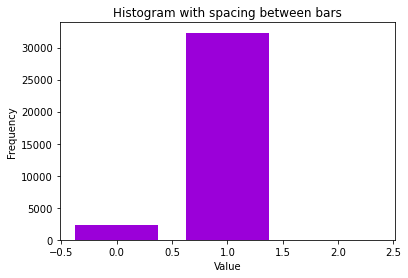

In [98]:
data = amazon['label']
min_bin = - 0.5
max_bin = 2.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

In [99]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])
print(amazon_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [100]:
X = pd.DataFrame(amazon_countvectorizer.toarray())
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
34655      0      0      0      0      0      0      0      0      0      0   
34656      0      0      0      0      0      0      0      0      0      0   
34657      0      0      0      0      0      0      0      0      0      0   
34658      0      0      0      0      0      0      0      0      0      0   
34659      0      0      0      0      0      0      0      0      0      0   

       ...  22322  22323  22324  22325  22326  22327  22328  22329  22330  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
34655  ...      0      0      0      0      0      0      0      0      0   
34656  ...      0      0      0      0      0      0      0      0      0   
34657  ...      0      0      0      0      0      0      0      0      0   
34658  ...      0      0      0      0      0      0      0      0      0   
34659  ...      0      0      0      0      0      0      0      0      0   

       22331  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
34655      0  
34656      0  
34657      0  
34658      0  
34659      0  

[34660 rows x 22332 columns]

In [101]:
y = amazon['label']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [103]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

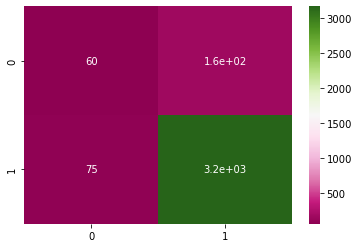

In [104]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [105]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.44      0.27      0.34       221
           1       0.95      0.98      0.96      3245

    accuracy                           0.93      3466
   macro avg       0.70      0.62      0.65      3466
weighted avg       0.92      0.93      0.92      3466



## For more methods:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))